# Regresión lineal: Costo de un incidente de seguridad
En este ejercicio se explican los fundamentos de la regresión lineal aplicada a un caso sencillo relacionado con la CyberSeguridad

#### Enunciado del Ejercicio
El ejercicio consiste en predecir el costo de un incidente de seguridad en base al numero de equipos afectados el conjunto de datos es generado de manera aleatoria.

## 1.- Generación del DataSet

In [1]:
import numpy as np

X = 2 * np.random.rand(100,1)
Y = 4 + 3 * X + np.random.randn(100, 1)
print("La longitud del DataSet es: ", len(X))

La longitud del DataSet es:  100


## 2.- Visualización del DataSet

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

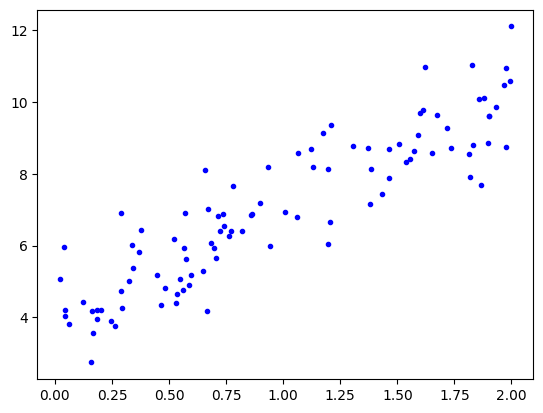

In [3]:
plt.plot(X, Y, "b.")
plt.show()

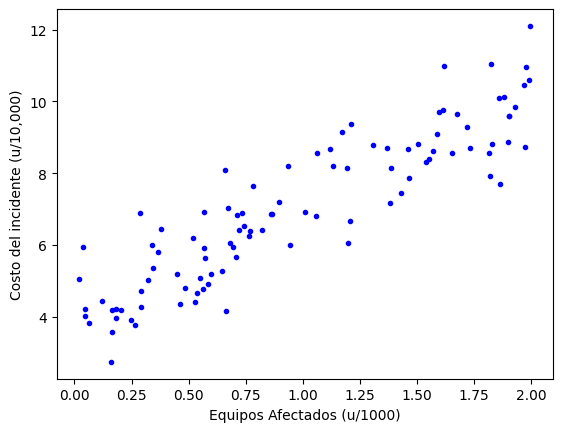

In [4]:
plt.plot(X, Y, "b.")
plt.xlabel("Equipos Afectados (u/1000)")
plt.ylabel("Costo del incidente (u/10,000)")
plt.show()

## 3.- Modificación del DataSet

In [5]:
import pandas as pd
data = {'No_Equipos-Afectados': X.flatten(), 'Costo': Y.flatten()}
df = pd.DataFrame(data)
df.head(10)

,No_Equipos-Afectados,Costo
0,1.859709,10.094567
1,1.598506,9.701851
2,1.194613,8.145072
3,0.933867,8.200379
4,0.859101,6.853335
5,0.322630,5.020862
6,1.996961,12.101964
7,1.673964,9.643060
8,0.572916,5.636131
9,0.037942,5.947308


In [6]:
# Escalando el número de equipos afectados
df['No_Equipos-Afectados'] = df['No_Equipos-Afectados'] * 1000
df['No_Equipos-Afectados'] = df['No_Equipos-Afectados'].astype(int)
# Escalado del costo
df['Costo'] = df['Costo'] * 10000
df['Costo'] = df['Costo'].astype(int)

df.head(10)

,No_Equipos-Afectados,Costo
0,1859,100945
1,1598,97018
2,1194,81450
3,933,82003
4,859,68533
5,322,50208
6,1996,121019
7,1673,96430
8,572,56361
9,37,59473


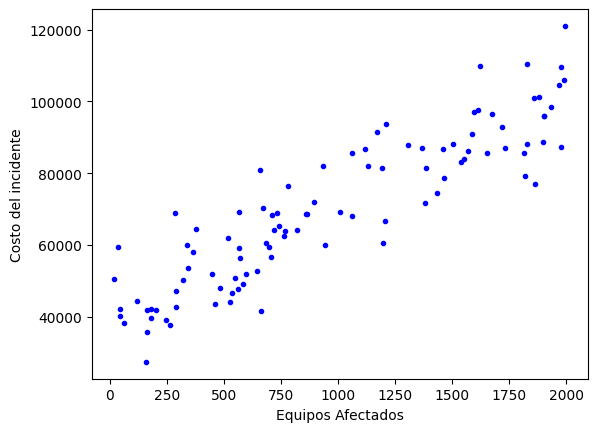

In [7]:
# Representacion gráfica del DataSet
plt.plot(df['No_Equipos-Afectados'], df['Costo'], "b.")
plt.xlabel("Equipos Afectados")
plt.ylabel("Costo del incidente")
plt.show()

## 4.- Construcción del Modelo


In [8]:
from sklearn.linear_model import LinearRegression

In [9]:
# Construcción del modelo y ajuste de la función de hipotesis
lin_reg = LinearRegression()
lin_reg.fit(df['No_Equipos-Afectados'].values.reshape(-1, 1), df['Costo'].values)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [10]:
# Parametro Theta 0
lin_reg.intercept_

np.float64(39881.11083088306)

In [11]:
# Parametro Theta 1
lin_reg.coef_

array([30.97654174])

In [12]:
# Predicción para el valor mínimo y máximo del DataSet de entrenamiento
X_min_max = np.array([[df["No_Equipos-Afectados"].min()], [df["No_Equipos-Afectados"].max()]])
y_train_pred = lin_reg.predict(X_min_max)

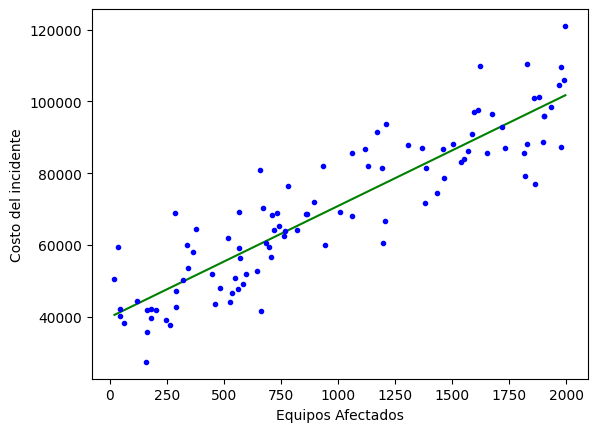

In [13]:
# Representación grafica de Hipótesis generada
plt.plot(X_min_max, y_train_pred, "g-")
plt.plot(df['No_Equipos-Afectados'], df['Costo'], "b.")
plt.xlabel("Equipos Afectados")
plt.ylabel("Costo del incidente")
plt.show()

## 5.- Predicción de nuevos Ejemplos

In [14]:
X_new = np.array([[1500]]) #1500 equipos afectados

# Predicción del costo que tendria el incidente
Costo = lin_reg.predict(X_new)
print("El costo del incidente seria: $", int(Costo[0]))


El costo del incidente seria: $ 86345


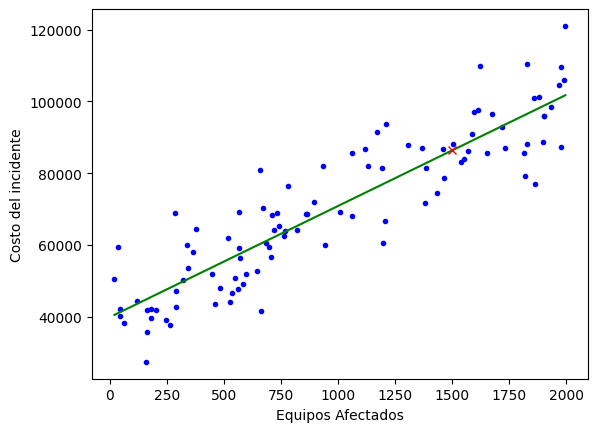

In [15]:
plt.plot(df['No_Equipos-Afectados'], df['Costo'], "b.")
plt.plot(X_min_max, y_train_pred, "g-")
plt.plot(X_new, Costo, "rx")
plt.xlabel("Equipos Afectados")
plt.ylabel("Costo del incidente")
plt.show()

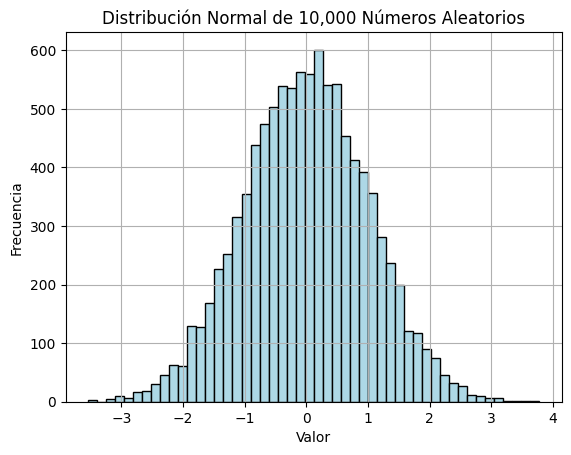

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Generar 10,000 números con distribución normal (media=0, desviación estándar=1)
datos = np.random.normal(loc=0, scale=1, size=10000)

# Graficar la distribución
plt.scatter(x, datos, color='b', s=5, alpha=0.5)
plt.title('Distribución Normal de 10,000 Números Aleatorios')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()